In [10]:
!pip install nltk==3.4.5

You should consider upgrading via the '/lnet/aic/personal/kydliceh/non_runable/NLP_venv/bin/python3 -m pip install --upgrade pip' command.


In [11]:
import sys
sys.path.append("../")

In [12]:
from pathlib import Path
file = Path("../no_duplicates") / "aktualne.jsonb"

In [13]:

from article_utils import create_df
df = create_df(file)
df.Name = "aktualne"

100%|██████████| 159892/159892 [05:28<00:00, 486.37it/s]


In [14]:
df.columns

Index(['url', 'article_length', 'headline_length', 'brief_length', 'num_words',
       'num_words_ratio', 'num_words_per_line', 'avg_word_length', 'non_alpha',
       'non_alpha_ratio', 'date'],
      dtype='object')

In [15]:
df.describe()

,article_length,headline_length,brief_length,num_words,num_words_ratio,num_words_per_line,avg_word_length,non_alpha,non_alpha_ratio
count,159892.000000,159892.000000,159892.000000,159892.000000,159892.000000,159892.000000,159892.000000,159892.000000,159892.000000
mean,3021.018225,69.848842,209.688202,521.124052,0.170780,39.717501,4.993793,89.091799,0.028424
std,2381.047084,16.443751,140.216250,428.509277,0.014514,16.568913,0.396759,89.339399,0.013125
min,1.000000,9.000000,1.000000,1.000000,0.081081,1.000000,1.000000,0.000000,0.000000
25%,1573.000000,54.000000,87.000000,263.000000,0.162194,30.523810,4.769607,39.000000,0.022526
50%,2447.000000,72.000000,166.000000,415.000000,0.168545,38.666667,5.027915,65.000000,0.025895
75%,3738.000000,83.000000,314.000000,642.000000,0.176669,47.000000,5.252101,108.000000,0.030247
max,102252.000000,100.000000,700.000000,18664.000000,1.000000,1827.000000,12.000000,3994.000000,1.000000


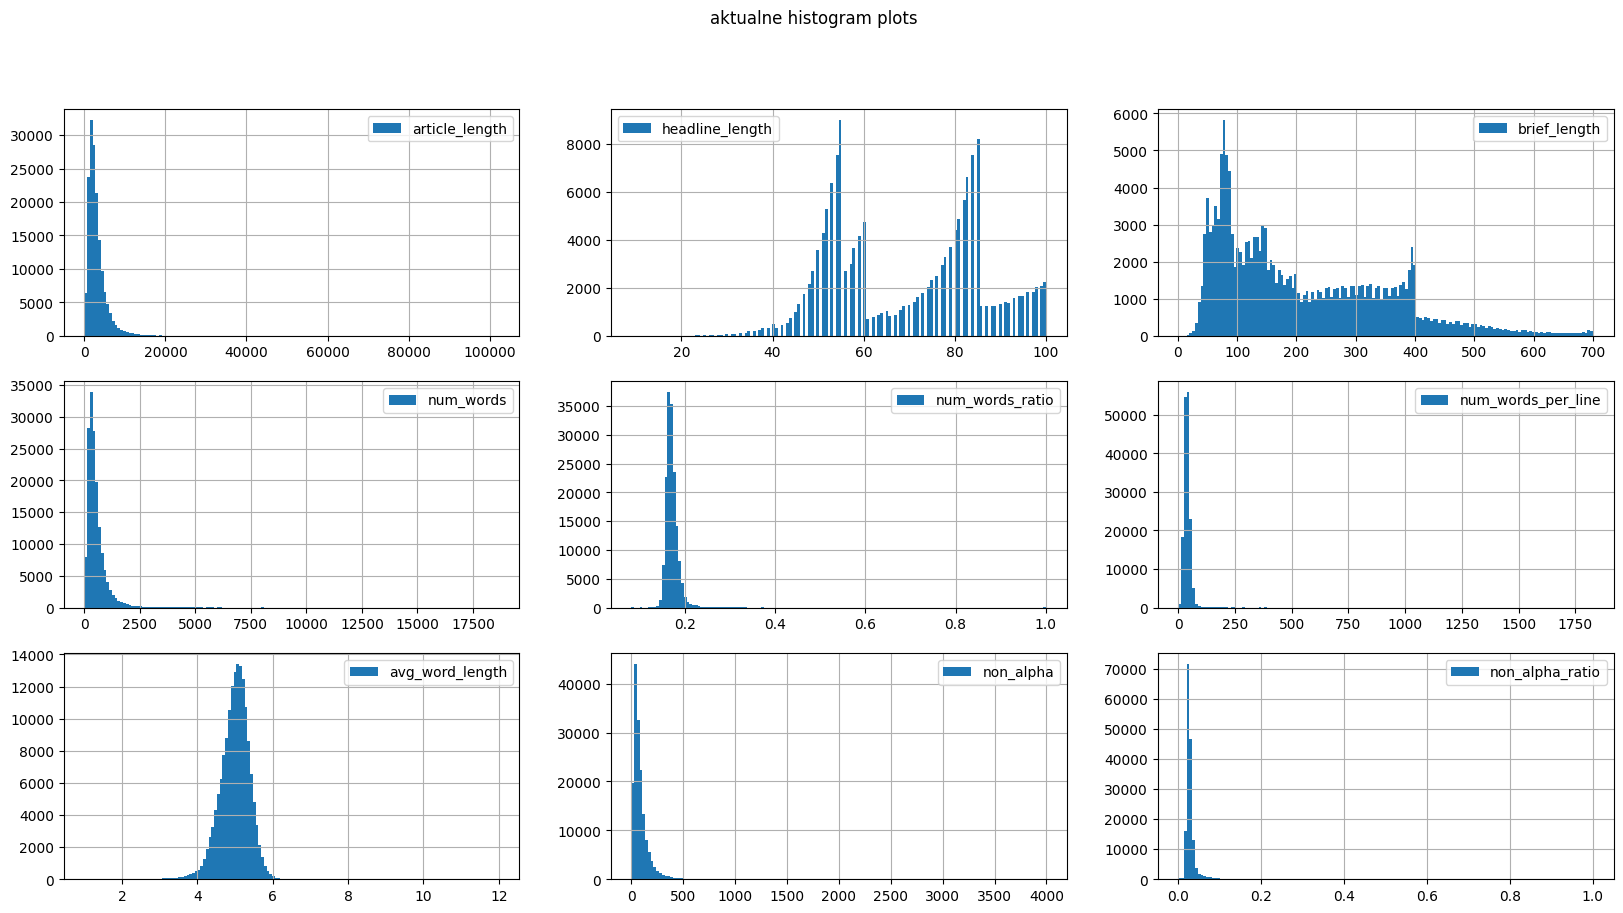

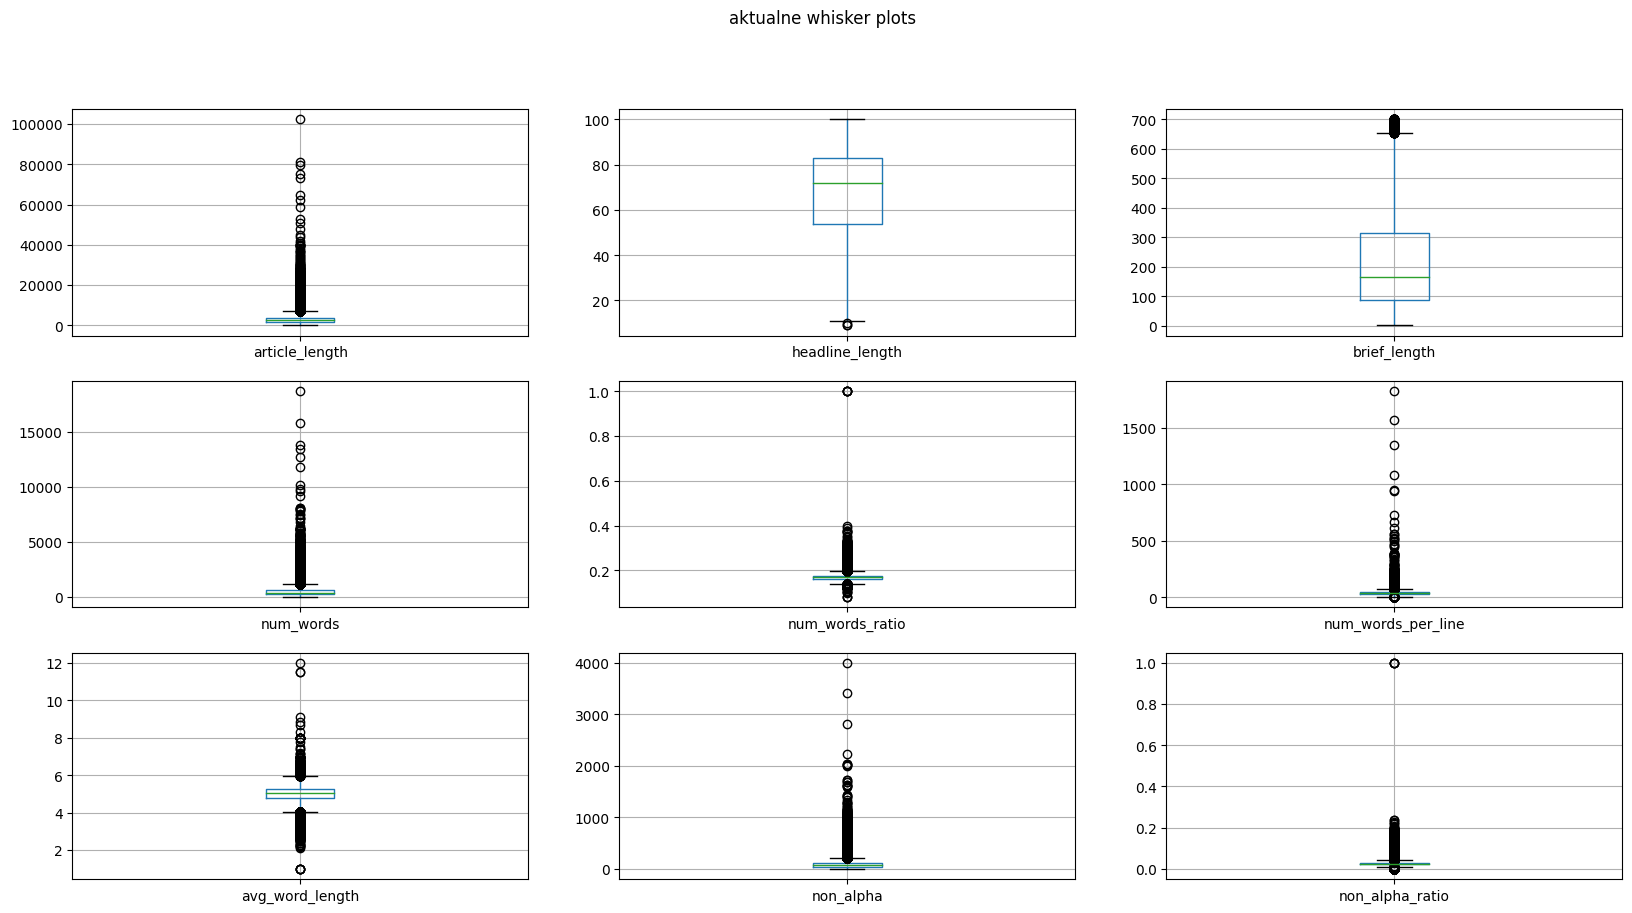

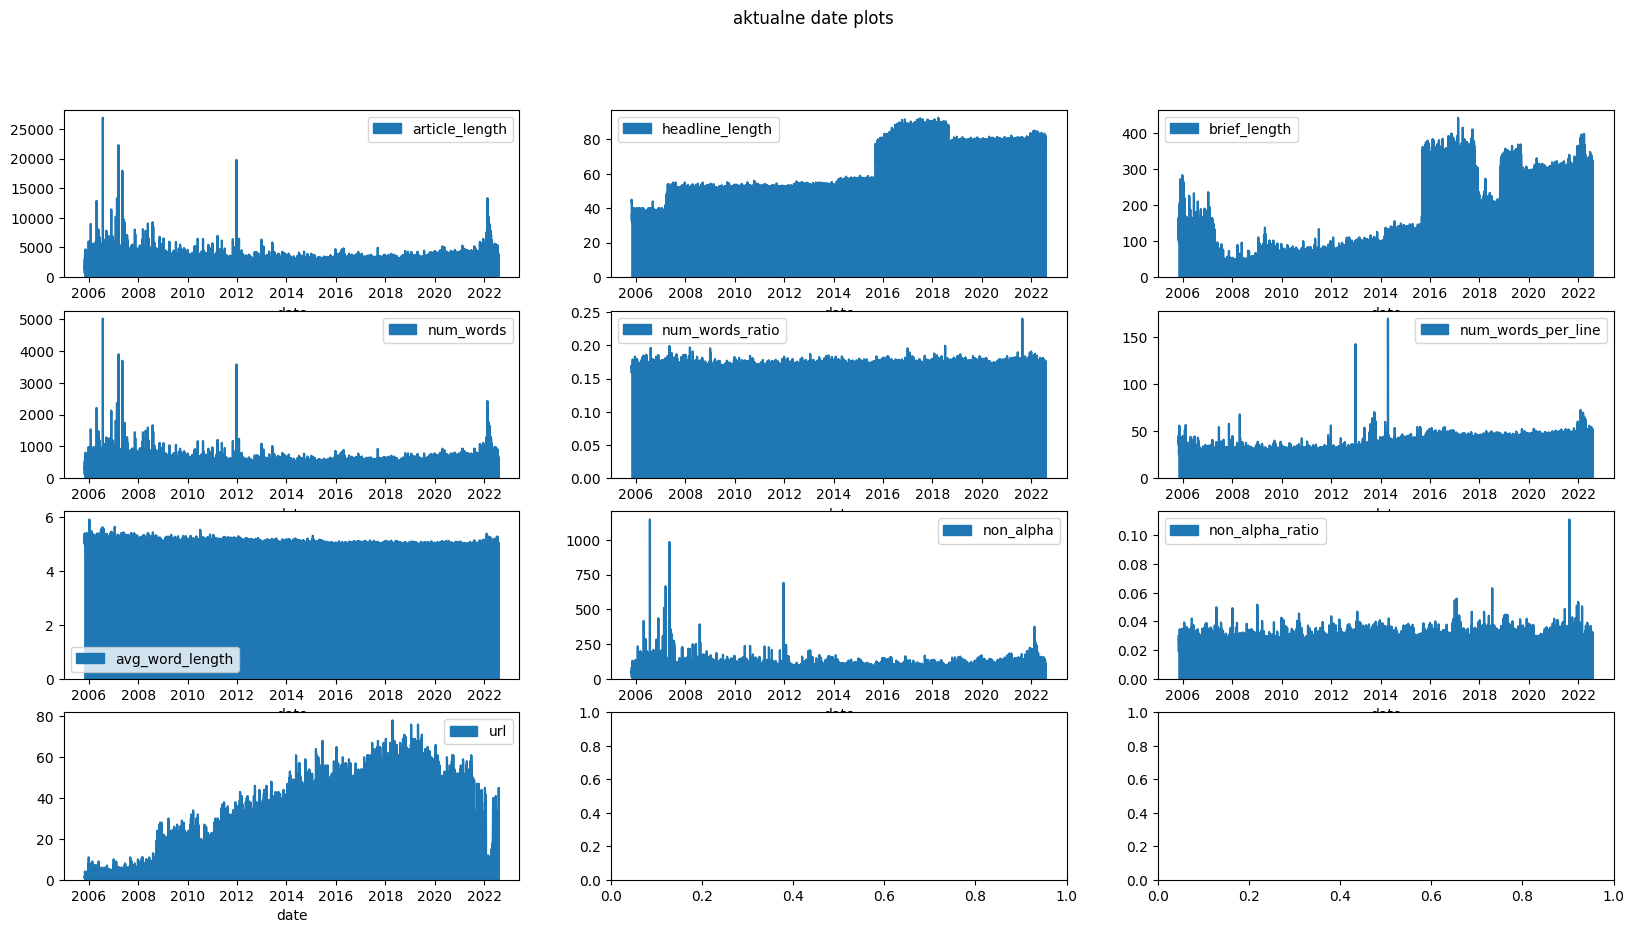

In [16]:
from article_utils import create_exploratory_plots
create_exploratory_plots(df,save=True)

In [17]:

from preprocess_utils import show_outlier_by_percentiles, show_df_lines, show_outliers, pick_indexes
col = "headline_length"
headline_mod = lambda x: x["headline"]

df_tmp = show_outlier_by_percentiles(df, col, 0.999, limit=20)
show_df_lines(df_tmp, file, headline_mod)
# Okayage

100%|██████████| 159892/159892 [00:08<00:00, 17934.67it/s]


In [18]:

df_tmp = show_outliers(df, col, 20, "lower", limit=10, random=False)
show_df_lines(df_tmp, file, headline_mod)

# Shows that we shouldn have split by -

 19%|█▉        | 30692/159892 [00:01<00:07, 17989.81it/s]

Krejčířův stín
Růže mezi trny?


 28%|██▊       | 45355/159892 [00:02<00:06, 17525.53it/s]

Tady je Havlovo
Honda boduje v USA


 33%|███▎      | 52501/159892 [00:02<00:06, 17693.00it/s]

Česko sužuje sucho


 40%|███▉      | 63519/159892 [00:03<00:05, 17893.41it/s]

Den D pro ECB?


 76%|███████▌  | 120725/159892 [00:06<00:02, 18022.69it/s]

Zapni se a leť
Žlutý anděl v nouzi


 88%|████████▊ | 140693/159892 [00:07<00:01, 18122.95it/s]

Kdo je Tomáš Pitr
Rytíři a zrcadlo


100%|██████████| 159892/159892 [00:08<00:00, 17894.95it/s]


In [19]:
df_tmp = df.sort_values(col, ascending=False)
show_df_lines(df_tmp[0:1], file, headline_mod)

 58%|█████▊    | 92500/159892 [00:05<00:03, 18429.39it/s]

Severokorejec dokázal téměř nemožné. Útěk s džípem přes hranici i palbu kolegů přežije a bude mluvit


100%|██████████| 159892/159892 [00:08<00:00, 18133.85it/s]


In [21]:
df.columns

Index(['url', 'article_length', 'headline_length', 'brief_length', 'num_words',
       'num_words_ratio', 'num_words_per_line', 'avg_word_length', 'non_alpha',
       'non_alpha_ratio', 'date'],
      dtype='object')

In [20]:
col = "headline_length"
grouped = df.groupby(col).count()
grouped[45:60]
# first drop = 55
first = df[df[col] == 55].sample(20)

grouped[58:62]
# second drop = 60
second = df[df[col] == 60].sample(20)

grouped[80:100]
# third drop = 85
third = df[df[col] == 85].sample(20)


mod = lambda x: x["url"] + "\n" + x["headline"]
print("FIRST\n")
show_df_lines(first, file, mod)
print("SECOND\n\n\n")
show_df_lines(second, file, mod)
print("THIRD\n\n\n")
show_df_lines(third, file, mod)



KeyError: 'headline length'

In [ ]:
%load_ext autoreload
%autoreload 2

https://zpravy.aktualne.cz/sokovali-experty-dostali-bludne-balvany/r~i:article:376770/
Šokovali experty. Dostali Bludné balvany
https://magazin.aktualne.cz/kultura/umeni/s-brumbalem-je-konec-tipuje-prekladatel/r~i:article:373670/
S Brumbálem je konec, tipuje překladatel
https://zpravy.aktualne.cz/domaci/politika/hucin-chtel-do-senatu-jde-ale-pred-soud/r~i:article:372329/
Hučín chtěl do Senátu. Jde ale před soud
https://zpravy.aktualne.cz/domaci/online-klaus-priletel-na-dedinu-vrtulnikem/r~i:article:376788/
Online: Klaus přiletěl na dědinu vrtulníkem
https://magazin.aktualne.cz/kultura/film/proc-to-vsechno-pta-se-marcela-i-divaci/r~i:article:367566/
Proč to všechno, ptá se Marcela i diváci
https://zpravy.aktualne.cz/domaci/vzkaz-z-usa-s-radary-predbihame-ameriku/r~i:article:368413/
Vzkaz z USA: S radary předbíháme Ameriku
https://zpravy.aktualne.cz/ekonomika/ceska-ekonomika/policie-obvinila-v-nove-kauze-lidi-z-cka/r~i:article:369293/?utm_source=mediafed&utm_medium=rss&utm_campaign=media

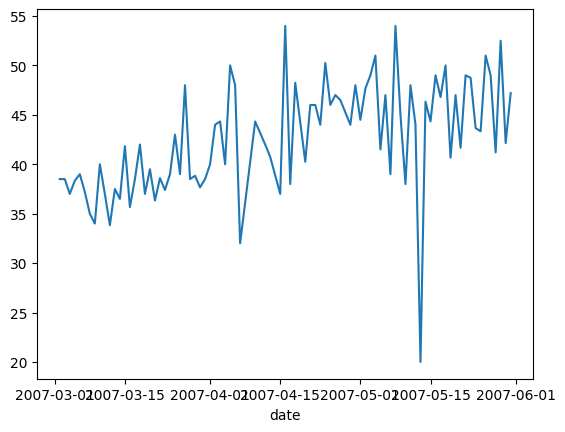

In [ ]:
from datetime import datetime
from article_utils import inspect_drop_date
mod = lambda x: x["url"] + "\n" + x["headline"]

inspect_drop_date(df, col, file, mod, datetime(2007, 3, 1), datetime(2007, 6, 1), datetime(2007,3,15))




TAIL



https://zpravy.aktualne.cz/zahranici/prepiste-ucebnice-vedci-objevili-ostatky-cloveka-hvezdneho-n/r~b0cb056257a111e5a896002590604f2e/
Převratný objev: Vědci našli ostatky člověka hvězdného, nejchytřejšího příbuzného homo sapiens
https://zpravy.aktualne.cz/regiony/praha/prazska-ods-chce-zrusit-mistni-sdruzeni-v-dablicich-ktere-pr/r~cd1daa7e570d11e5b440002590604f2e/
Pražská ODS chce zrušit místní sdružení v Ďáblicích, které přijalo kontroverzního exstarostu Noska
https://nazory.aktualne.cz/komentare/nesnasenlivost-zamiri-z-facebooku-na-volebni-billboardy-nic/r~6852c54857c111e5a896002590604f2e/
Nesnášenlivost zamíří z Facebooku na volební billboardy. Nic pěkného, měly by se zrušit. Všechny
https://nazory.aktualne.cz/komentare/ruske-vojaky-v-syrii-bychom-vitat-nemeli/r~5b79be16562811e5a705002590604f2e/
Ruští vojáci v Sýrii nepřinesou nic dobrého. Kreml chce především zachránit režim Bašára Asada
https://zpravy.aktualne.cz/regiony/moravskoslezsky/soudni-znalkyne-u-soudu-s-kramnym-ne

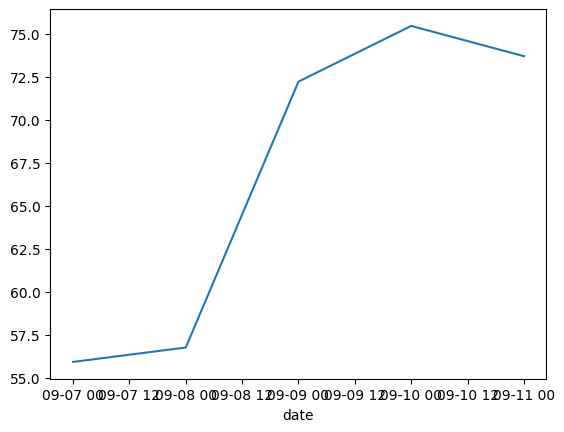

In [ ]:
from datetime import datetime
# This is change from ext1 to ext2

inspect_drop_date(df, col, file, mod, datetime(2015, 9, 6), datetime(2015, 9, 12), datetime(2015,9,8))

https://zpravy.aktualne.cz/zahranici/brutalni-belgicky-dzihadista-a-sef-obavane-policie-islamskeh/r~be132d94a54111e8b3e20cc47ab5f122/
Brutální popravčí a šéf mravnostní policie Islámského státu. Zemřel nejhledanější belgický terorista
https://zpravy.aktualne.cz/domaci/politika/za-opakovany-prestupek-vyhosteni-v-boleslavi-je-problem-s-ci/r~98bc59dea62311e8b634ac1f6b220ee8/
Za opakovaný přestupek vyhoštění. V Boleslavi je problém s cizinci, Čechů se to netýká, říká Nwelati
https://zpravy.aktualne.cz/domaci/uniky-informaci-propojeni-s-politiky-gibs-se-musi-zmenit-pak/r~0d155cc2a55211e8b3e20cc47ab5f122/
Úniky informací, propojení s politiky. GIBS se musí změnit, pak může fungovat, píše její budoucí šéf
https://zpravy.aktualne.cz/domaci/zacinam-druhy-zivot-profesi-kvuli-nehode-nezmenim-rekl-ridic/r~cd0159aca5f011e890620cc47ab5f122/
"Tak jsem mrtvej, snad to bude rychlý." Český řidič poprvé popsal, jak přežil zřícení mostu v Janově
https://zpravy.aktualne.cz/zahranici/sef-rumunske-vladni-str

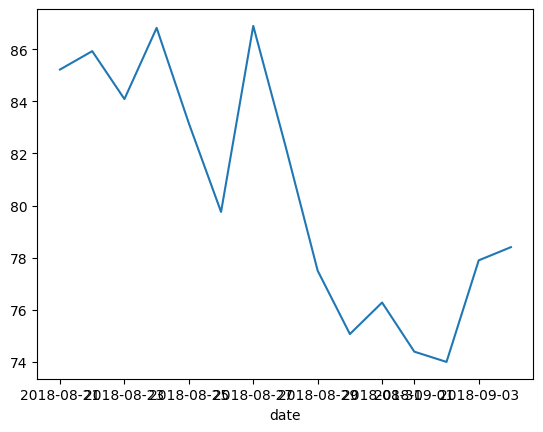

In [ ]:
dates_adjusted = df[(df["date"] > datetime(2018, 8, 20).date()) & (df["date"] < datetime(2018, 9, 5).date())]
inspect_drop_date(df, col, file, mod, datetime(2018, 8, 20), datetime(2018, 9, 5), datetime(2018,8,23),type="down")

array([[<AxesSubplot:title={'center':'article length'}>]], dtype=object)

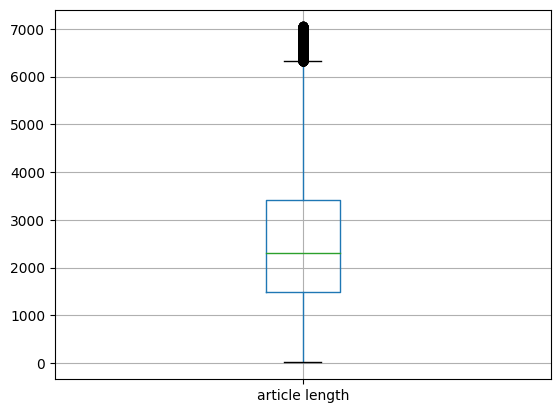

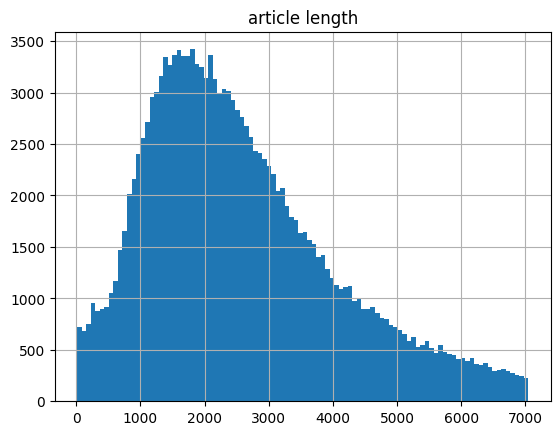

In [ ]:

import numpy as np
# ARTICLE LENGTH
#show_df_lines(df_art, file, mod)
col = "article_length"
# Long articles -> podcast transcript
df_art = df[df[col] < np.quantile(df[col], 0.95)]
df_art.boxplot(column=col)
df_art.hist(column=col, bins=100)


In [ ]:
df_art = show_outliers(df,col, 130000, "higher" , limit=5)

content_mod = lambda art : art["url"] + "\n" + art["content"] + "\n---------------\n"
show_df_lines(df_art, file, content_mod)

KeyboardInterrupt: 

In [ ]:
from preprocess_utils import show_outliers
df_art = show_outliers(df,col, 300, "lower", limit=10, random=False)
show_df_lines(df_art, file, content_mod)

https://magazin.aktualne.cz/obrazem/test-jak-dobre-znate-ceske-a-moravske-hrady-a-zamky/r~e7118b1864e611e49e4b0025900fea04/
Kvíz - Hrady a zámky jsou odkazem naší historie. Jsou svědectvím časů, živou pamětí i poslem minulosti. Jsou leckdy monumentální a mohou se chlubit jedinečnou architekturou. Každá tato památka má svůj jedinečný příběh.
Znáte tyto architektonické chlouby naší vlasti? Vyzkoušejte se v našem testu >>!
---------------

https://zpravy.aktualne.cz/ekonomika/bydleni/nejlepsi-lonske-stavby-ze-dreva-podivejte-se-na-viteze/r~c7258400c54311e391780025900fea04/
Praha - Nadace Dřevo pro život ocenila nejlepší návrhy i reálné stavby ze dřeva v anketě Dřevěná stavba roku 2013. Ve třetím ročníku rozhodly odborná mezinárodní porota a veřejnost o celkem dvanácti cenách v šesti kategoriích. Podívejte se, které stavby ze dřeva porotu i veřejnost oslovily nejvíce.
---------------

https://sport.aktualne.cz/fotbal/guerrera-nezastavily-ani-venezuelske-amazonky/r~i:gallery:21146/
Parádní 

In [ ]:
# Word length

col = "avg_word_length"
df_word = show_outliers(df,col, 6.5, "higher", limit=5)
# shows 
show_df_lines(df_word, file, content_mod)

https://sport.aktualne.cz/fotbal/video-nizozemec-sno-zkolaboval-behem-zapasu-uz-podruhe/r~c792ea700bf111e285fa0025900fea04/
Praha - Hodně nepříjemný zážitek má za sebou nizozemský fotbalista Evander Sno. Pětadvacetiletý záložník Nijmegenu zkolaboval uprostřed víkendového zápasu Eredivise na půdě Feyenoordu.
Po krátké zástavě Snoovi srdce naštěstí znovu naskočilo díky voperovanému defibrilátoru. Mohl tak hrací plochu za asistence lékaře a spoluhráčů opustit po vlastních nohou. Následně byl převezen do nemocnice na pozorování.
Někdejší mládežnický reprezentant však nezkolaboval přímo na hřišti poprvé. Podobnou zkušenost prodělal již předloni coby hráč Ajaxu Amsterodam v zápase rezervních týmů. Právě poté mu lékaři voperovali defibrilátor.
---------------

https://sport.aktualne.cz/fotbal/ms-ve-fotbale/fifa-odebrala-peru-poradatelstvi-ms-fotbalistu-do-17-let/r~2524d480375811e998d70cc47ab5f122/?utm_source=mediafed&utm_medium=rss&utm_campaign=mediafed
FIFA rozhodla odebrat Peruáncům turnaj 

In [ ]:


df_word = show_outliers(df,col, 3.8,  "lower", limit=5, random=False)
show_df_lines(df_word, file, content_mod)


https://sport.aktualne.cz/hokej/chomutov-v-trinci-dlouho-vzdoroval-rozhodl-znovu-ruzicka/r~c94e73c8073411e2a4ec002590604f2e/
Praha - Brno padlo. Prvním týmem nového ročníku extraligy, který zastavil úřadujícího vicemistra Kometu Brno, je až v pátém kole Zlín.
Berani v moravském derby porazili na domácím ledě Kometu 4:3 v prodloužení. Druhý bod vystřelil domácím Antonín Honejsek.
Brno po celý zápas dotahovalo ztrátu, na všech brankách Komety měla prsty úderná útočná dvojice Tomáš a Jakub Svobodové.
I navzdory porážce Kometa stále zůstává v čele soutěže, kde má nyní dva body náskok na Třinec.
V Třinci zase pálil Růžička
Až posledních pět minut rozhodlo o výsledku utkání mezi Třincem a Chomutovem.
Třinečtí měli po celý zápas drtivou střeleckou i herní převahu, ale nováček soutěže dlouho odolával hlavně díky fanastickému Matůši Kostúrovi v bráně.
Až v 56. minutě ho šestým gólem v sezoně propálil Martin Růžička a rozhodl o vítězství Ocelářů.
Na konečných 2:0 zvýšil střelou do prázdné bány p

In [ ]:
# Word num

col = "num_words_ratio"
mod = lambda art : art["content"]
df_word = show_outliers(df,col, 0.22, "higher", limit=10, random=False)
show_df_lines(df_word, file, content_mod)

https://sport.aktualne.cz/ostatni-sporty/presque-isle-biatlon-ctvrtek/r~5ebfbdd2d0da11e5ae64002590604f2e/
Presque Isle - Gabriela Soukalová slaví další triumf ve Světovém poháru bialtonistek, když po bezchybné střelbě jasně opanovala dnešní sprint v americkém Presque Isle. V celkovém hodnocení seriálu tak navýšila náskok na prvním místě na 115 bodů. Veronika Vítková obsadila desáté místo.
"Můžeme jenom chválit. Gábina předvedla famózní výkon. Dvě nuly a asi devátý nejrychlejší čas. Měla sice jednu kalibrovější ránu vleže, ale i tak dokázala, že právem drží žlutý i červený trikot," rozplýval se v rozhovoru pro Českou televizi trenér českých biatlonistek Zdeněk Vítek.
Sprint žen jsme sledovali živě ZDE
V závodě mužů skončil Michal Šlesingr na 14. místě, bodoval ještě na 29. místě Michal Krčmář.
Sprint mužů jsme sledovali živě ZDE
Soukalová byla od prvních metrů pod velkým tlakem, protože hned za ní vystartovala do závodu její úhlavní pronásledovatelka v boji o křišťálový glóbus Italka Do

In [ ]:

df_word = show_outliers(df,col, 0.11, "lower", limit=10)
mod = lambda art : art["content"]
show_df_lines(df_word, file, content_mod)


https://sport.aktualne.cz/hokej/obrazem-bodovani-ms-vedou-eriksson-a-malkin/r~i:gallery:26635/
Projděte si prostřednictvím fotografií individuální statistiky hokejového šampionátu.
---------------

https://zpravy.aktualne.cz/galerie-a-videa/foto-architektonicka-toulka-po-slavnych-a-prazdnych-vilach-a/r~06dfcb1654eb11e7ac060025900fea04/
Projekt Prázdnédomy.cz vytváří celorepublikovou databázi.
---------------

https://zpravy.aktualne.cz/ekonomika/technika/tady-je-25-webu-ktere-vam-ukradnou-ucet-na-facebooku/r~i:article:723209/
Phishingový útok má vždy stejnou a jednoduchou formu. Na vaši e-mailovou adresu přijde zpráva, ve které vás například vaše banka upozorňuje, že byste si měli zkontrolovat stav svého účtu.
Po kliknutí na odkaz se vám otevře stránka podobná té oficiální bankovní. Web po vás bude chtít přihlášení. Údaje, které na něm zadáte, však získá podvodník a s nimi i přístup k vašemu účtu.
Falešný Facebook
Podobně (jen se tu nabízela nová služba) probíhal například poslední vět

In [ ]:
# BRIEF INSPECTION
col = "brief_length"
df_tmp = show_outliers(df,col, 280, "higher", limit=10)
mod_brief = lambda x: x["url"] + "\n" + x["brief"] + "\n---------------\n "
print("280\n")
show_df_lines(df_tmp, file, mod_brief)
print("500\n")

df_tmp = show_outliers(df,col, 500, "higher", limit=10)
show_df_lines(df_tmp, file, mod_brief)



df.groupby("date")[col].max().plot.area()

280

https://magazin.aktualne.cz/bydleni/cabin-porn-inspirace-pro-milovniky-prirody-a-jednoduche-arch/r~8db828c0d34711e694810025900fea04/
Blog Cabin Porn se stal za dobu svojí existence inspirací pro tisíce lidí na celém světě. Ve stejnojmenné publikaci nabízí jeho autoři dvě stovky těch nejzajímavějších dřevěných chatek z celého světa. Kniha má být především výzvou ke zvolnění tempa a připomínkou řemeslných tradic.
---------------
 
https://zpravy.aktualne.cz/ekonomika/auto/koncept-zavodniho-elektromobilu-ma-1000-koni-trat-pokori-i-b/r~087b2aceb39811e58dc0002590604f2e/
Futuristický koncept nazvaný FFZERO1 je prvním počinem nově vznikající automobilky, která chce brzy konkurovat Tesle. Faraday Future bude vyrábět elektromobily v Nevadě. Zatím ukazuje vůz, který má výkon 1000 koní a zvládne jezdit bez zásahu řidiče na silnici i na závodním okruhu.
---------------
 


KeyboardInterrupt: 

In [ ]:

df_tmp = show_outliers(df,col, 20, "lower", limit=20, random=False)
show_df_lines(df_tmp, file, mod_brief)


https://sport.aktualne.cz/tenis/tri-prekvapiva-vyrazeni-v-jeden-den-murray-wawrinka-a-raonic/r~64d969bc55e411e7a6500025900fea04/
Šance pro Berdycha?
---------------
 
https://sport.aktualne.cz/fotbal/ms-ve-fotbale/fotbaliste-iranu-se-po-brazilii-a-rusku-stali-tretim-ucastni/r~c934e5c04fa011e7983b002590604f2e/
Írán to dokázal :-)
---------------
 
https://sport.aktualne.cz/fotbal/ceska-liga/trener-stramaccioni-priletel-do-prahy-podepsat-smlouvu-ve-sp/r~c8afc1da40ad11e791210025900fea04/
Už je to podepsáno.
---------------
 
https://sport.aktualne.cz/fotbal/prazske-derby-pro-spartu-remizu-odmitnul-wilfried/r~i:article:677814/
Slavia - Sparta 1:2
---------------
 
https://sport.aktualne.cz/horky-konec-cesi-prohrali-s-finskem-a-jedou-domu/r~i:article:661757/
Česko - Finsko 0:2
---------------
 
https://sport.aktualne.cz/fotbal/do-zlina-uz-chodi-kvalita-prisli-zkuseni-valecnici-pochvaluj/r~75fb4ace72d311e79584002590604f2e/
Uspěje Zlíncester?
---------------
 
https://zpravy.aktualne.cz/regio

In [ ]:
# strange brief drop
col = "brief_length"
df.groupby(col).count()[150:190]
# 150 is is max then drop

df_tmp = df[df[col] == 150].sample(30)
show_df_lines(df_tmp, file, mod_brief)



https://magazin.aktualne.cz/ceska-mesta-trpi-pod-nanosy-nevkusne-reklamy-rika-designerka/r~7308d57eb3d011e6b635002590604f2e/
Problém s vizuálním smogem je i na západě, ale má jinou formu a dodržuje základní pravidlo, že reklama na památky nepatří, říká Veronika Rút Nováková.
---------------
 
https://magazin.aktualne.cz/cestovani/karavan-predstavuje-svobodu-vyuzivam-ho-i-pro-cesty-na-lyze/r~d93f4016a66b11eb8335ac1f6b220ee8/
Jan Herget si první obytný vůz pořídil před 11 lety. Současný ředitel agentury CzechTourism v karavanu obráží Česko i Evropu společně se svou rodinou.
---------------
 
https://nazory.aktualne.cz/komentare/nazor-zachranit-tradicni-rodinu-je-jako-krisit-dinosaura/r~4575c608f71111e984c6ac1f6b220ee8/
Žijeme v době rozkolu, ale co je rodina víc než oddanost, odpovědnost a odpuštění? Neexistuje rodina tradiční, jen rodina dobrá, nebo rodina k ničemu.
---------------
 
https://zpravy.aktualne.cz/domaci/dalik-stravil-cast-trestu-ve-znojemskem-penzionu-hlidal-ho-j/r~5d78413

https://zpravy.aktualne.cz/ekonomika/svetova-ekonomika/hyundai-nepostavi-cesi-ale-japonci/r~i:article:383752/
Nošovice - Továrnu Hyundai nepostaví žádná tuzemská stavební firma, generálním dodavatelem nošovické továrny je japonská Takenaka. Uvnitř: VIDEO
---------------
 
https://zpravy.aktualne.cz/domaci/havel-drzi-hladovku-za-uzunogla/r~i:article:384756/
Praha - Bývalý prezident Václav Havel se připojil k hladovce na podporu kurdského lékaře a podnikatele Yekty Uzunogla.
---------------
 
https://zpravy.aktualne.cz/ekonomika/svetova-ekonomika/otevrene-nebe-rozproudi-letecky-prumysl/r~i:article:384868/
Brusel - Dnes uzavřená dohoda mezi USA a Evropskou unií zlevní letenky přes Atlantik a otevře aeroliniím všechna letiště na obou stranách oceánu.
---------------
 
https://zpravy.aktualne.cz/zahranici/eu-jde-do-boje-zasahne-rychle-a-kdekoli/r~i:article:385337/
Brusel (Od zpravodaje) - Speciální jednotka špičkově vybavených vojáků se připravuje do akce pod vlajkou EU. Nemusí však nikdy z

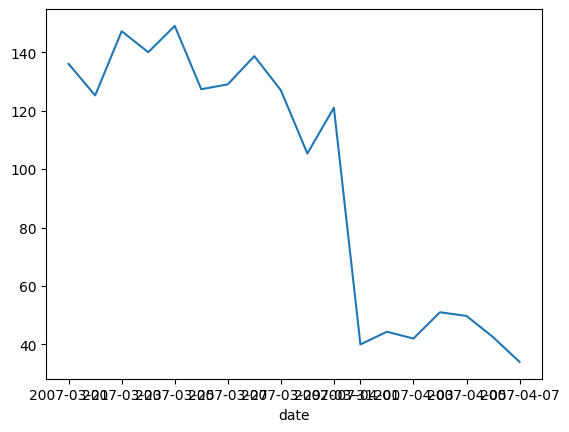

In [ ]:
inspect_drop_date(df, col, file, mod_brief, datetime(2007, 3, 20), datetime(2007, 4, 8), datetime(2007,3,24), type="down")

In [ ]:
col = "non_alpha_ratio"
df_tmp = show_outliers(df,col, 0.06, "higher", limit=10)
show_df_lines(df_tmp, file, content_mod)
import numpy as np

https://zpravy.aktualne.cz/regiony/kralovehradecky/jicin-kasarna-neproda-zvelebi-si-je-sam/r~i:article:718891/
Jičín - Radnice v Jičíně areál bývalých kasáren v centru města neprodá a výběrové řízení na investora zruší.
"Zrušení tendru městským zastupitelům jednomyslně doporučila rada," řekli představitelé radnice. Město se pokoušelo najít investora pro pětihektarový areál kasáren od roku 2006.
Radnice by zatím chtěla v revitalizaci kasáren pokračovat sama. Prodejem území kasáren už se sítěmi by mohla získat výrazně větší výnos, než kdyby areál v nynějším stavu prodala investorovi.
Podle místostarosty Tomáše Frýby (TOP 09) by rozdíl v zisku pro město mohl být v desítkách milionů korun.
Tendr na investora kasáren v roce 2009 vyhrála písecká firma Czech development, která v nich chtěla postavit asi 300 bytů, kanceláře a objekty občanské vybavenosti. Radnice s píseckou firmou smlouvu dosud nepodepsala, ač letos v březnu prodej kasáren zastupitelé schválili.
Jičín začal v září s demolicí
F

KeyboardInterrupt: 

In [ ]:
col = "non_alpha_ratio"
df_tmp = show_outliers(df,col, 0.01, "lower", limit=10)
show_df_lines(df_tmp, file, content_mod)
import numpy as np


https://sport.aktualne.cz/ostatni-sporty/neumannova-jen-malo-sportovcu-se-zabezpeci-do-konce-zivota/r~7846650c6a6b11e497f0002590604f2e/
Praha - Příští rok vznikne po vzoru Mezinárodního olympijského výboru i v tom českém program komplexní podpory pro sportovce ve vzdělávání a při hledání práce po sportovní kariéře s názvem Duální kariéra.
---------------

https://zpravy.aktualne.cz/ekonomika/auto/o-tato-auta-maji-cesi-v-bazarech-nejvetsi-zajem-prinasime-pr/r~0824db24abf311e7b286002590604f2e/
Tady publikujeme přehled nejprodávanějších nových aut v Česku za prvních devět měsíců letošního roku.
---------------

https://zpravy.aktualne.cz/regiony/stredocesky/ledove-kry-bariera-berounka-cernosice-povoden/r~i:gallery:18211/
Hráz z ledových ker na jednom z jezů Berounky se o víkendu protrhla a řeka zatopila černošické  břehy.
---------------

https://sport.aktualne.cz/ostatni-sporty/video-fury-zazpival-serenadu-klicko-a-vyhral-boj-o-rukavice/r~7c1712fe939511e5979c0025900fea04/
Ukrajinec Vladi

In [ ]:
# num words per line
col = "num_words_per_line"
df_tmp = show_outliers(df,col, 100, "higher", limit=10)
show_df_lines(df_tmp, file, content_mod)

https://zpravy.aktualne.cz/ekonomika/auto/oblibena-auta-v-cesku-zdrazuji-i-o-desitky-tisic-najdou-se-a/r~cb194908ba6211ec8a24ac1f6b220ee8/
Zvýšení ceny je často viditelnější u levnějších automobilů, jejichž symbolem je už nějakou dobu Dacia. Ta v dubnu opět zdražovala. Ne tedy nějak výrazně, nicméně s tím, že nejde o ojedinělé zvýšení cen, ale spíše o opakující se trend, už to pro některé zájemce může být citelné. Tak například populární SUV Dacia Duster stojí od dubna nejméně 359 900 korun, a to se 66kW přeplňovaným litrovým tříválcem a výbavou Essential. Připomeňme, že už v lednu dovozce vyřadil z nabídky nejchudší stupeň Access. V březnu přitom stejný Duster stál o deset tisíc korun méně a v únoru startoval ještě o tři tisícovky níže. O deset tisíc ostatně plošně zdražila v dubnu celá nabídka Dusteru, výbava vozu se ovšem nezměnila.
Další zvýšení cen postihlo i aktuální horkou novinku, až sedmimístné kombi Jogger. Když Dacia loni v prosinci odhalila ceník, stála základní výbava s po

KeyboardInterrupt: 

array([[<AxesSubplot:title={'center':'num words per line'}>]],
      dtype=object)

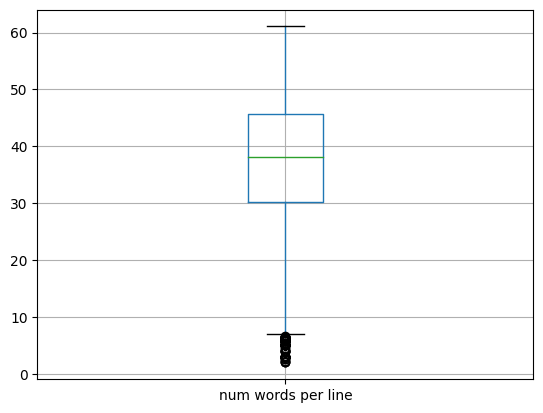

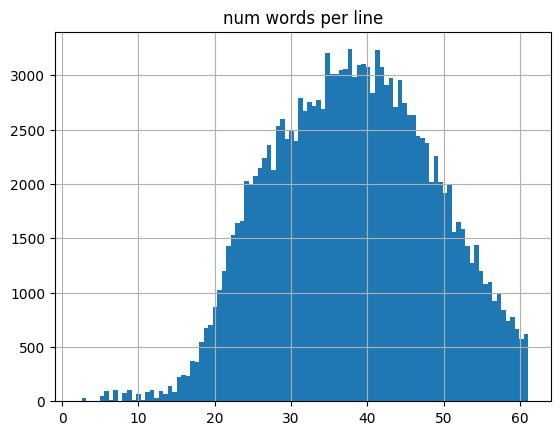

In [ ]:

col = "num_words_per_line"
df_art = df[df[col] < np.quantile(df[col], 0.95)]
df_art.boxplot(column=col)
df_art.hist(column=col, bins=100)

In [ ]:

# num words per line
df_tmp = show_outlier_by_percentiles(df,col, 0.999, limit=2)
show_df_lines(df_tmp, file, content_mod)

https://zpravy.aktualne.cz/domaci/tramvaje-jezdi-v-praze-120-let-driv-za-8-krajcaru-/r~i:gallery:21047/
Před 120 lety začala v hlavním městě jezdit první elektrická tramvaj. Svůj provoz zahájila 18. července 1891 a byla první elektrickou drahou v českých zemích. Postavil a vyprojektoval ji u příležitosti Zemské jubilejní výstavy na pražském Výstavišti František Křižík. V Praze městskou dopravu tehdy zajišťovala od roku 1875 jen soukromá koněspřežná tramvaj. Tramvaje pražského dopravního podniku od té doby urazily v rámci pražské MHD téměř 5,8 miliardy kilometrů a svezly více než 36 miliard cestujících. První trať začínala u dnešní restaurace Letenský zámeček, kde byla zároveň vozovna, která sloužila i jako krytá čekárna. V jejím sousedství byla malá elektrárna, která vyráběla pro pohon tramvaje elektrický proud o napětí 150 voltů. Pražané si novinku oblíbili, i když lístek stál, jak vyplývá ze smlouvy mezi Prahou a Františkem Křižíkem, osm krejcarů. Prohlédněte si, jak historii nejen p

In [ ]:

df_tmp = show_outliers(df,col, 10, "lower", limit=2)
show_df_lines(df_tmp, file, content_mod)

https://zpravy.aktualne.cz/ekonomika/technika/vysledky-souteze-kdo-vyhral-zivotopis-steva-jobse/r~i:article:726004/
Těsně před vánočními svátky ještě několika z vás stihneme nadělit pod stromeček zajímavý dárek - životopis Steva Jobse v českém překladu.
O papírovou i elektronickou verzi knihy jste mohli na Dataramě soutěžit v uplynulých týdnech. Ceny do soutěže věnovalo internetové knihkupectví e-Reading.cz.
Stačil správně odpovědět na tři vědomostní otázky a trefit se do počtu lidí, kteří se soutěže zúčastnili. Nakonec jich bylo přesně 117. A tady jsou výsledky:
Životopis Steva Jobse - papírová kniha
Ondřej Kolařík, Kroměříž
Sisa Urbanová, Martin
Ondřej Jirsa, Praha
Životopis Steva Jobse - e-book
Tomáš Fojtík, Praha
Alena Říhová, Brno
Samuel Pastva, Bratislava
David Lempochner, Český Těšín
Martin Šiman, Most
Výhercům gratulujeme!
Pokud jste nevyhráli, nabízí vám knihkupectví e-Reading cenu útěchy: elektronickou verzi knihy si na tomto odkazu můžete koupit s výraznou slevou.
TIP: Líbí 

<AxesSubplot:xlabel='date'>

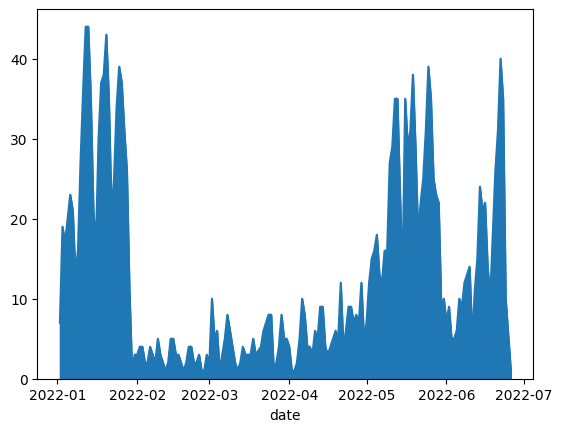

In [ ]:
df[df["date"] > datetime(2022, 1, 1).date()].groupby("date")["url"].count().plot.area()